In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv('new_income_evaluation.csv')
data

,Unnamed: 0,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,32556,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32534,32557,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32535,32558,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32536,32559,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32534,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32535,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32536,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [5]:
data.duplicated().sum()

0

In [6]:
X = data.drop('income', axis=1)
y = data['income']

In [7]:
X.shape

(32538, 13)

In [8]:
y.shape

(32538,)

In [9]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [10]:
print(f'shape of X_temp: {X_temp.shape}')
print(f'shape of y_temp: {y_temp.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_temp: (27657, 13)
shape of y_temp: (27657,)
shape of X_test: (4881, 13)
shape of y_test: (4881,)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

In [12]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of X_train: (23508, 13)
shape of y_val: (4149,)
shape of X_train: (23508, 13)
shape of y_val: (4149,)


In [13]:
df = data.loc[data['age']>80]
df

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
222,2,8,0,4,0,1,0,38,0,90,51744,0,2206,40
918,6,8,1,1,1,0,0,38,0,81,136063,0,0,30
1040,2,8,0,4,0,0,1,38,0,90,137018,0,0,40
1168,6,15,1,3,1,0,0,38,0,88,206291,0,0,40
1935,2,12,1,1,1,0,0,38,0,90,221832,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32255,2,8,6,0,4,0,1,38,0,90,313749,0,0,25
32345,3,3,1,11,1,0,0,38,0,90,214594,2653,0,40
32436,2,12,1,1,1,0,0,30,0,85,98611,0,0,3
32471,3,8,0,4,0,0,0,38,0,82,403910,0,0,3


In [14]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

In [15]:
X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

In [16]:
X_train_norm.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
30733,0.285714,0.600000,0.166667,0.076923,0.2,0.0,0.0,0.950,0.561644,0.164770,0.0,0.000000,0.397959
11958,0.714286,0.800000,0.166667,0.230769,0.2,0.0,0.0,0.950,0.465753,0.016576,0.0,0.000000,0.397959
13190,1.000000,0.666667,0.166667,0.076923,0.4,0.0,1.0,0.950,0.397260,0.123965,0.0,0.000000,0.397959
19503,0.285714,0.400000,0.166667,0.153846,0.2,0.5,0.0,0.975,0.178082,0.130989,0.0,0.379017,0.397959
29204,0.285714,0.600000,0.666667,0.000000,0.0,0.0,1.0,0.950,0.301370,0.142366,0.0,0.000000,0.397959
20221,0.285714,0.800000,0.166667,0.461538,0.2,0.5,0.0,0.725,0.246575,0.139482,0.0,0.000000,0.397959
13898,0.285714,0.600000,0.666667,0.000000,0.0,0.0,1.0,0.950,0.301370,0.046584,0.0,0.000000,0.602041
27781,0.857143,0.533333,1.000000,0.000000,0.8,0.0,1.0,0.950,0.602740,0.114530,0.0,0.000000,0.193878
30701,0.285714,0.533333,0.000000,0.307692,0.8,0.0,0.0,0.625,0.082192,0.268136,0.0,0.000000,0.346939
21717,0.285714,0.533333,0.000000,0.000000,0.0,0.0,0.0,0.950,0.109589,0.147607,0.0,0.000000,0.397959


In [17]:
X_val_norm.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
20995,0.285714,0.600000,0.166667,0.076923,0.2,0.00,0.0,0.950,0.219178,0.112106,0.0,0.0,0.448980
17498,0.714286,0.800000,0.166667,0.307692,0.2,0.00,0.0,0.950,0.835616,0.073842,0.0,0.0,0.020408
32295,0.714286,0.600000,0.666667,0.000000,0.0,0.00,1.0,0.950,0.630137,0.106459,0.0,0.0,0.040816
11426,0.857143,0.600000,0.166667,0.461538,0.2,0.00,0.0,0.950,0.315068,0.016284,0.0,0.0,0.602041
21534,0.857143,0.733333,0.166667,0.307692,0.4,0.00,1.0,0.950,0.109589,0.094726,0.0,0.0,0.448980
22010,0.285714,0.533333,0.000000,0.769231,1.0,0.50,0.0,0.975,0.082192,0.152659,0.0,0.0,0.397959
15530,0.285714,0.600000,0.000000,0.076923,0.0,0.25,0.0,0.625,0.054795,0.109379,0.0,0.0,0.479592
28886,0.285714,0.600000,0.666667,0.692308,0.8,0.00,1.0,0.950,0.205479,0.060088,0.0,0.0,0.397959
9237,0.285714,0.533333,0.000000,0.000000,0.6,0.00,1.0,0.950,0.123288,0.233287,0.0,0.0,0.397959
24402,0.428571,0.533333,0.166667,0.307692,0.2,0.25,0.0,0.950,0.452055,0.186726,0.0,0.0,0.397959


In [18]:
scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

In [19]:
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [20]:
def SVCClass(X_train, X_val, X_test, y_train, y_val, y_test):
    
    svc = SVC()

    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc = []
    
    index = ['X_test', 'X_val']
    
    data_type = [X_test, X_val]
    target_type = [y_test, y_val]
    columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    result = pd.DataFrame(columns=columns, index=index)

    for i in range(0, len(data_type)):
        predict = svc.fit(X_train, y_train).predict(data_type[i])

        accuracy.append(accuracy_score(target_type[i], predict))
        precision.append(precision_score(target_type[i], predict))
        recall.append(recall_score(target_type[i], predict, average='weighted'))
        f1.append(f1_score(target_type[i], predict, average='weighted'))
        roc.append(roc_auc_score(target_type[i], predict, average='weighted'))
    
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1 Score'] = f1
    result['ROC AUC'] = roc

    return result.sort_values('F1 Score', ascending=False)

In [21]:
SVCClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.845728,0.770807,0.845728,0.834063,0.731796
X_val,0.844782,0.782540,0.844782,0.831472,0.724747


In [22]:
SVCClass(X_train_s, X_val_s, X_test_s, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.849826,0.788036,0.849826,0.838023,0.735656
X_val,0.848879,0.790047,0.848879,0.836514,0.732565


In [23]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.95526636e-01, 4.45862921e-03, 1.46990498e-05, 1.67070153e-08,
       1.31840523e-08, 3.96421731e-09, 9.55579071e-10, 5.11655467e-10,
       2.20871003e-10, 1.98370755e-10, 1.53793361e-10, 3.42935686e-11,
       1.55709126e-11])

In [24]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

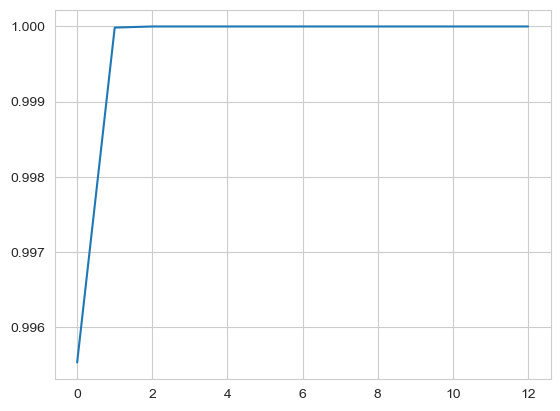

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

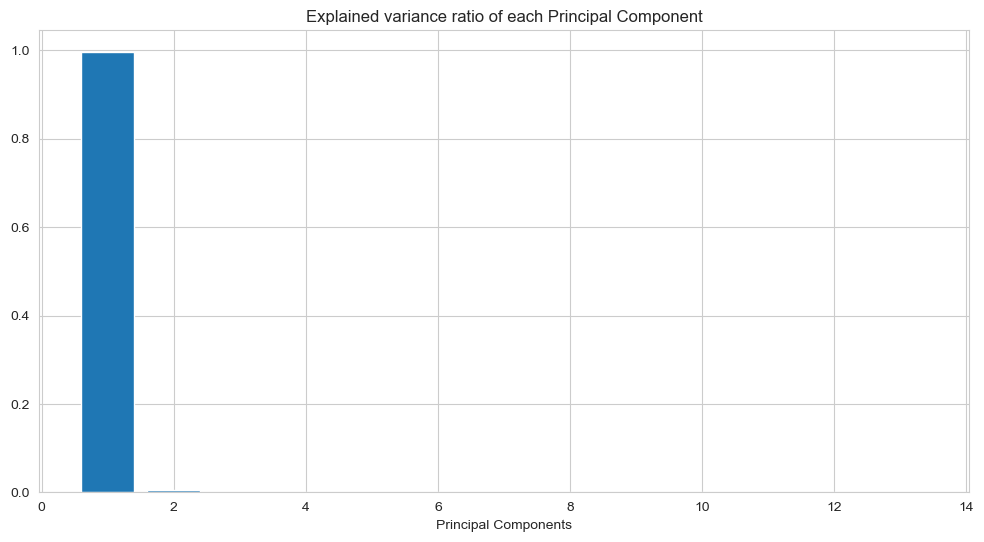

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label='explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

In [27]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(data.T))

print(f'Eigenvectors: {eig_vecs}')
print(f'Eigenvalues: {eig_vals}')

Eigenvectors: [[-6.85713856e-07  1.48230564e-05 -1.38094943e-04 -2.29766824e-02
   5.03323163e-03  4.93998044e-03 -1.57781263e-02 -7.79446259e-02
  -3.32690732e-01  9.35809287e-01  8.00323732e-02  5.42528176e-03
   1.52231737e-02  3.08165255e-03]
 [-1.10056475e-06  4.48519460e-05 -5.30410181e-04 -9.93535473e-03
   2.80322219e-02  3.15490106e-02 -3.94568213e-01 -9.01919747e-01
   1.52588738e-01 -2.32912339e-02 -5.69741498e-02  3.42154725e-03
   1.18622076e-02 -4.18602275e-02]
 [-3.33474955e-07 -1.19661278e-06  2.13052344e-05 -4.44717328e-02
  -1.43816970e-02  2.74654683e-03 -4.02311797e-03  1.04625743e-01
   8.29477297e-01  2.63937052e-01  4.69480739e-01 -1.09287193e-02
  -9.27927526e-02 -2.77614620e-03]
 [ 3.17934095e-07 -1.75175576e-05  1.80734903e-04 -3.97823898e-03
   1.46956811e-03 -1.60631998e-02  9.17705419e-01 -3.90114219e-01
   6.52843301e-02  7.58376828e-03 -2.09154179e-02 -7.70286299e-04
   2.05829448e-02  1.30519184e-02]
 [ 2.35064695e-07 -8.58144655e-06  1.85016647e-04  2.6

In [28]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)

[(11141888910.073261, array([-6.85713856e-07, -1.10056475e-06, -3.33474955e-07,  3.17934095e-07,
        2.35064695e-07,  3.82763376e-09, -1.20703683e-07, -3.87064651e-06,
       -3.84657821e-08, -9.87589814e-06,  9.99999999e-01,  3.02801246e-05,
       -3.91713915e-05, -2.21040843e-06])), (54580428.24336238, array([ 1.48230564e-05,  4.48519460e-05, -1.19661278e-06, -1.75175576e-05,
       -8.58144655e-06, -6.79988799e-07, -3.08673995e-06,  2.47792421e-06,
        1.29273362e-05,  1.43443952e-04, -3.03461073e-05,  9.99998481e-01,
       -1.73114501e-03,  1.31041351e-04])), (162307.36096831594, array([-1.38094943e-04, -5.30410181e-04,  2.13052344e-05,  1.80734903e-04,
        1.85016647e-04,  2.72199312e-05,  5.53854734e-05, -8.12468916e-05,
       -1.67297516e-04, -2.01531048e-03, -3.91436085e-05, -1.73059015e-03,
       -9.99994763e-01, -1.73496648e-03])), (186.44892817667395, array([-2.29766824e-02, -9.93535473e-03, -4.44717328e-02, -3.97823898e-03,
        2.61012508e-02,  2.0686803

In [29]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in (eig_vals)]
cum_var_exp = np.cumsum(var_exp)

print(f'Variance captured by each component is {var_exp}')
print(f'Cumulative variance captured as we travel each component {cum_var_exp}')

Variance captured by each component is [99.5110749611098, 0.48747183984434433, 0.0014496087776872113, 1.6652233223608386e-06, 1.3258016749321073e-06, 3.902802570490833e-07, 9.491279670975732e-08, 5.081314887500277e-08, 2.2107349510378104e-08, 1.9730683415403243e-08, 1.5258702469052623e-08, 3.3787738639983236e-09, 1.6185842990944313e-09, 1.1428867304685946e-09]
Cumulative variance captured as we travel each component [ 99.51107496  99.9985468   99.99999641  99.99999807  99.9999994
  99.99999979  99.99999989  99.99999994  99.99999996  99.99999998
  99.99999999 100.         100.         100.        ]


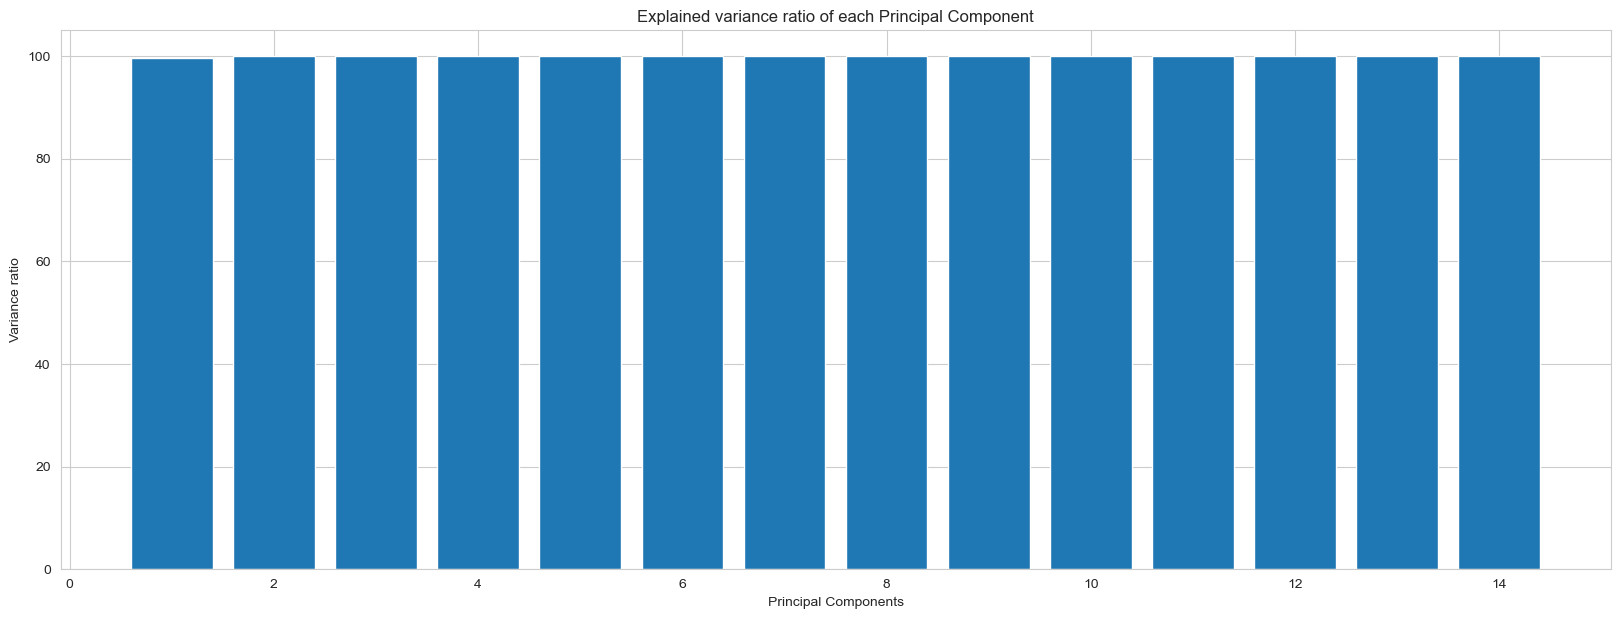

In [30]:
plt.figure(figsize=(20, 7))
plt.bar(range(1, len(cum_var_exp)+1), cum_var_exp, label='Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

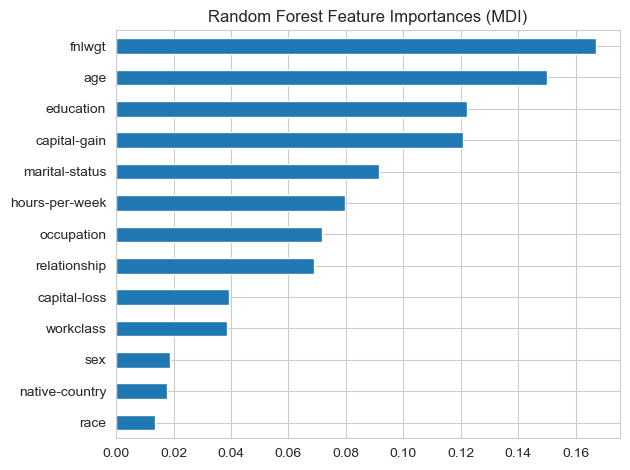

In [32]:
feature_names = data.drop('income', axis=1).columns.tolist()
mdi_importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title('Random Forest Feature Importances (MDI)')
ax.figure.tight_layout()

**With 12 features**

In [33]:
X = data.drop(['income', 'race'], axis=1)
y = data['income']

In [34]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

In [36]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of X_train: (23508, 12)
shape of y_val: (4149,)
shape of X_train: (23508, 12)
shape of y_val: (4149,)


In [37]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

In [38]:
scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [39]:
SVCClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.842860,0.739742,0.842860,0.833634,0.738323
X_val,0.840685,0.734440,0.840685,0.831234,0.735014


**with 11 features**

In [40]:
X = data.drop(['income', 'race', 'native-country'], axis=1)
y = data['income']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

In [41]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of X_train: (23508, 11)
shape of y_val: (4149,)
shape of X_train: (23508, 11)
shape of y_val: (4149,)


In [42]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [43]:
SVCClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.843270,0.759798,0.843270,0.831802,0.729886
X_val,0.839238,0.743777,0.839238,0.827950,0.726213


**with 10 features**

In [44]:
X = data.drop(['income', 'race', 'native-country', 'sex'], axis=1)
y = data['income']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

In [45]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of X_train: (23508, 10)
shape of y_val: (4149,)
shape of X_train: (23508, 10)
shape of y_val: (4149,)


In [46]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [47]:
SVCClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.844499,0.753341,0.844499,0.834305,0.73621
X_val,0.835382,0.728058,0.835382,0.824373,0.72299


**with 9 features**

In [48]:
X = data.drop(['income', 'race', 'native-country', 'sex', 'capital-loss'], axis=1)
y = data['income']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of X_train: (23508, 9)
shape of y_val: (4149,)
shape of X_train: (23508, 9)
shape of y_val: (4149,)


In [49]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [50]:
SVCClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.851465,0.770060,0.851465,0.842139,0.747473
X_val,0.841890,0.748555,0.841890,0.831185,0.731372


**PCA dengan 10 features memiliki score yang lebih tinggi dibandingkan dengan score lain**

In [51]:
X = data.drop(['income', 'race'], axis=1)
y = data['income']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

In [52]:
SVCClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.843475,0.754321,0.843475,0.832735,0.732923
X_val,0.830562,0.713669,0.830562,0.819230,0.716403


**Hyperparameter untuk SVM**

In [53]:
svc = SVC()
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [54]:
#from skopt import BayesSearchCV

#search_space = {'C': (1e-6, 1e+6, 'log-uniform'),
#                'gamma': (1e-6, 1e+1, 'log-uniform'),
#                'degree': (1, 5),
#                'kernel': ['linear', 'rbf']}

#opt = BayesSearchCV(svc, search_space, n_iter=50, cv=3, n_jobs=-1)

In [ ]:
#opt.fit(X_train_norm, y_train)

In [ ]:
#print("Best parameters found: ", opt.best_params_)

In [ ]:
#predict = opt.predict(X_test_norm)
#print(f'Accuracy: {accuracy_score(y_test, predict)}')

In [ ]:
#print(f'ROC AUC: {roc_auc_score(y_test, predict)}')

In [ ]:
#confusion_matrix(y_test, predict)

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

#cm = confusion_matrix(y_test, predict)
#cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
#cmd.plot()